In [29]:
import pandas as pd
import cv2
from utils.imageprocessing import *
%matplotlib inline

In [30]:
df_codis_info = pd.read_csv("data/codis_info.csv")

In [31]:
df_codis_info.head()

,name,color1_ratio,color1_R,color1_G,color1_B,color1_H,color1_S,color1_V,color2_ratio,color2_R,...,color2_H,color2_S,color2_V,color3_ratio,color3_R,color3_G,color3_B,color3_H,color3_S,color3_V
0,395456,0.551991,19.320905,74.595451,101.896916,199.837334,0.810388,0.399596,0.333034,118.239044,...,214.511815,0.269768,0.634980,0.114975,225.549086,231.383136,234.056347,198.853620,0.036347,0.917868
1,395457,0.366889,235.853713,237.499254,243.467044,227.031633,0.031270,0.954773,0.354360,9.342645,...,216.527696,0.916439,0.438454,0.278750,111.742195,129.048105,134.951698,195.261662,0.171984,0.529222
2,395458,0.479153,29.906952,32.739913,34.298083,201.290686,0.128028,0.134502,0.327135,91.206920,...,208.477727,0.330124,0.533941,0.193712,242.472949,243.433101,245.646015,221.844349,0.012917,0.963318
3,395459,0.454407,251.017751,250.918482,250.725811,39.598121,0.001163,0.984383,0.334314,39.300630,...,91.225767,0.207809,0.172809,0.211279,98.980089,98.583512,67.683561,59.239704,0.316190,0.388157
4,395460,0.438510,125.794521,27.660428,34.185092,356.010766,0.780114,0.493312,0.397817,49.913950,...,289.895157,0.036079,0.196938,0.163673,228.921261,229.310303,230.060820,219.516178,0.004953,0.902199


In [32]:
19, 74, 101, 118, 136, 161, 225, 231, 234

(19, 74, 101, 118, 136, 161, 225, 231, 234)

### KNN_codis

In [33]:
def KNN_codis(color1, color2, color3, df_codis_info, debug=False):
    df_codis_rgb = df_codis_info.filter(regex="[RGB]")
    
    color1 = np.array(color1)
    color2 = np.array(color2)
    color3 = np.array(color3)
    color = np.concatenate([color1, color2, color3])
    
    # 유클리디안 거리 구하기
    eucliDist = np.linalg.norm(df_codis_rgb - color, axis = 1)
    
    # 가장 가까운 색상 구하기
    min_idx = np.argsort(eucliDist)[0]
    similar_codis_id = df_codis_info["name"][min_idx]
    
    codis_color = df_codis_rgb.iloc[min_idx].values
    
    if debug == True:
        print(similar_codis_id)
        print(color)
        print(codis_color)
        bar1 = plot_colors([0.33, 0.33, 0.33], color.reshape(3,3))
        bar2 = plot_colors([0.33, 0.33, 0.33], codis_color.reshape(3,3))
        plt.imshow(bar1)
        plt.axis("off")
        plt.show()
        
        plt.imshow(bar2)
        plt.axis("off")
        plt.show()
        
        img_path = "image/img/codis/" + str(similar_codis_id) + ".jpg"
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        
        

396307
[100   0 100 255 255 255   0 100 100]
[ 27.98474141  30.89061998  36.40266624 237.45664514 237.59816011
 240.96731259  45.31867612  60.2572104   89.37021277]


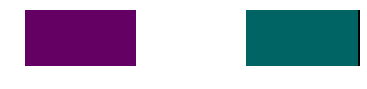

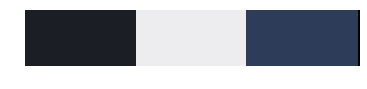

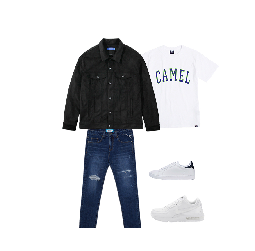

In [34]:
KNN_codis([100, 0, 100], [255, 255, 255], [0, 100, 100], df_codis_info, debug=True)

가장 가까운 비슷한 색상을 구했지만 무채색이 아닌경우에는 성능이 좋지않다.